In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('Dataset/heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
#finds the number of values for the classification label
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [8]:
#normalized the above to get the percentage of each class
df['HeartDisease'].value_counts(normalize=True) * 100

HeartDisease
1    55.337691
0    44.662309
Name: proportion, dtype: float64

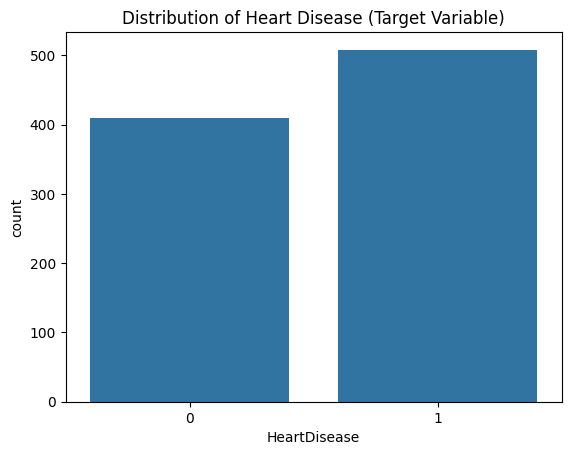

In [9]:
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Heart Disease (Target Variable)')
plt.show()

#the dataset seemed seems to be fairly balanced 

In [10]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [11]:
df['Sex'].value_counts(normalize=True) * 100

Sex
M    78.976035
F    21.023965
Name: proportion, dtype: float64

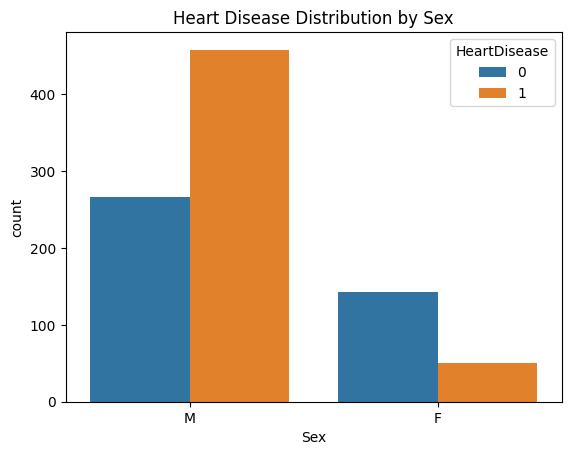

In [12]:
sns.countplot(x='Sex', data=df, hue='HeartDisease') # Hue to see distribution by target
plt.title('Heart Disease Distribution by Sex')
plt.show()

#data from male seems to be more prevalent


Now, we will analyse the univariate data, see hte common graphs to use for othe numerical and categorical data and how to interpret them.

--- Analyzing 'Age' (Numerical) ---


Text(0, 0.5, 'Frequency')

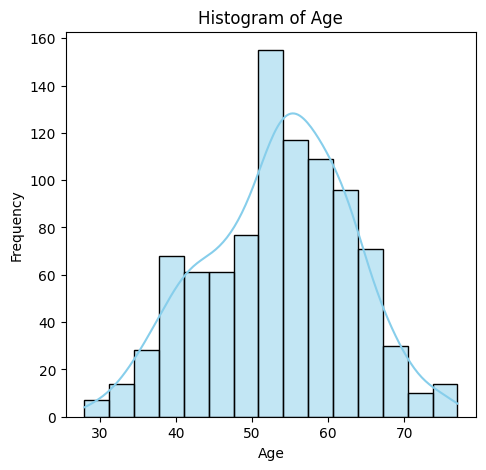

In [13]:
#Histogram: Visualize the frequency distribution of data points within specified bins. 
#Great for understanding the shape (e.g., normal, skewed, bimodal).

print("--- Analyzing 'Age' (Numerical) ---")

plt.figure(figsize=(18, 5))

# 1. Histogram
plt.subplot(1, 3, 1) # (rows, columns, panel number)
sns.histplot(df['Age'], kde=True, bins=15, color='skyblue') # kde=True adds density curve
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')


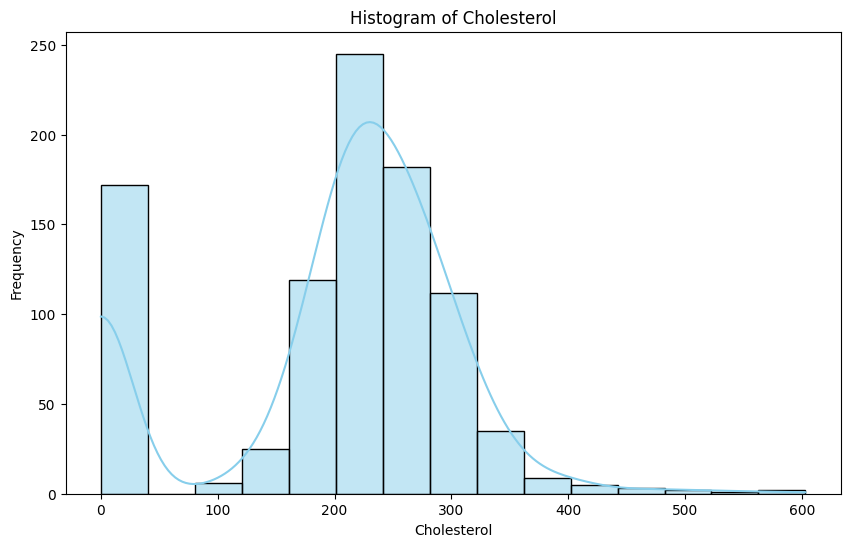

In [14]:
# Histogram for Cholesterol
plt.figure(figsize=(10, 6))
sns.histplot(df['Cholesterol'], kde=True, bins=15, color='skyblue')
plt.title('Histogram of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Cholesterol')

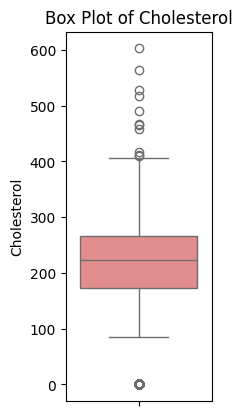

In [15]:
# 2. Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Cholesterol'], color='lightcoral')
plt.title('Box Plot of Cholesterol')
plt.ylabel('Cholesterol')

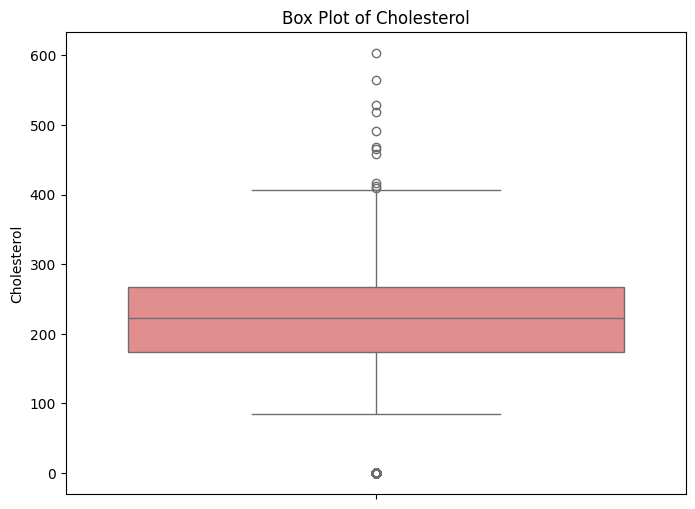

In [16]:
# Box Plot for Cholesterol
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Cholesterol'], color='lightcoral')
plt.title('Box Plot of Cholesterol')
plt.ylabel('Cholesterol')
plt.show()

Text(0, 0.5, 'Cholesterol')

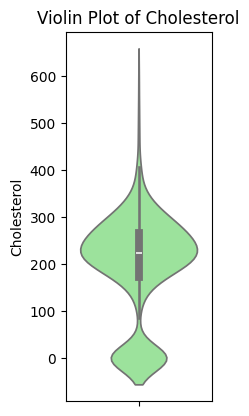

In [17]:
# 3. Violin Plot
plt.subplot(1, 3, 3)
sns.violinplot(y=df['Cholesterol'], color='lightgreen')
plt.title('Violin Plot of Cholesterol')
plt.ylabel('Cholesterol')

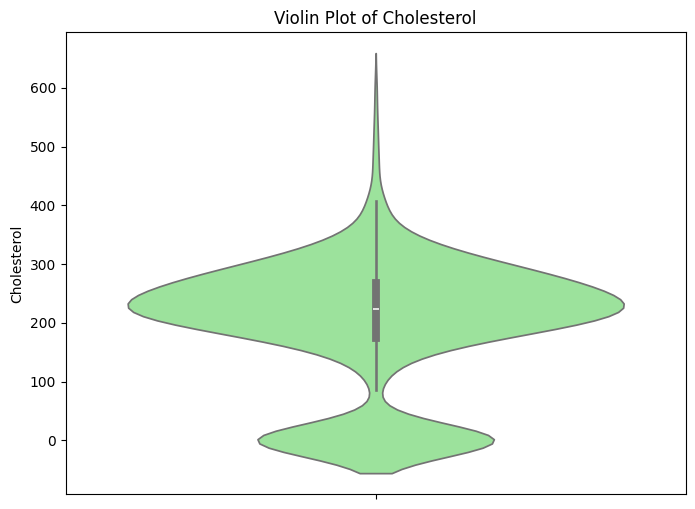

In [18]:
# Violin Plot for Cholesterol
plt.figure(figsize=(8, 6))
sns.violinplot(y=df['Cholesterol'], color='lightgreen')
plt.title('Violin Plot of Cholesterol')
plt.ylabel('Cholesterol')
plt.show()

we have covered some common graphs to display insights of numerical data froma  univariate point of view. Now, we will explore common graphs for categorical data.


--- Analyzing 'Sex' (Categorical) ---


C:\Users\nabil\AppData\Local\Temp\ipykernel_26804\3011298423.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Sex'], palette='viridis', order=df['Sex'].value_counts().index) # Order bars by frequency


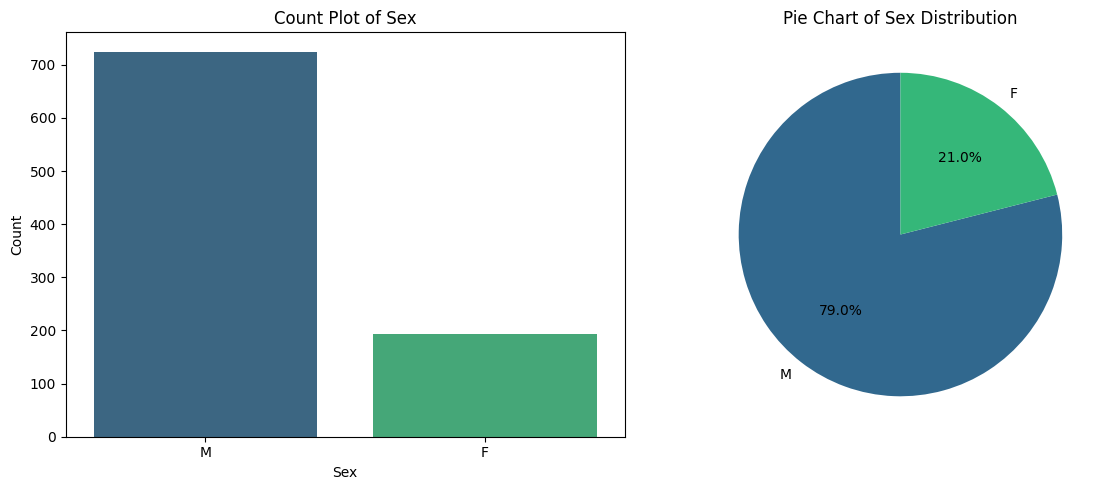


Value Counts for Sex:
Sex
M    725
F    193
Name: count, dtype: int64

Percentage Distribution for Sex:
Sex
M    78.976035
F    21.023965
Name: proportion, dtype: float64


In [19]:
print("\n--- Analyzing 'Sex' (Categorical) ---")

plt.figure(figsize=(12, 5))

# 1. Count Plot (Bar Plot)
plt.subplot(1, 2, 1)
sns.countplot(x=df['Sex'], palette='viridis', order=df['Sex'].value_counts().index) # Order bars by frequency
plt.title('Count Plot of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# 2. Pie Chart
plt.subplot(1, 2, 2)
sex_counts = df['Sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(sex_counts)))
plt.title('Pie Chart of Sex Distribution')

plt.tight_layout()
plt.show()

# Also show value counts
print("\nValue Counts for Sex:")
print(df['Sex'].value_counts())
print("\nPercentage Distribution for Sex:")
print(df['Sex'].value_counts(normalize=True) * 100)

We have looked at univariate graphs, now lets take a look at bivariate or even multivariate relationships and their graphs.


--- Example 1: Scatter Plot (Age vs MaxHR) ---


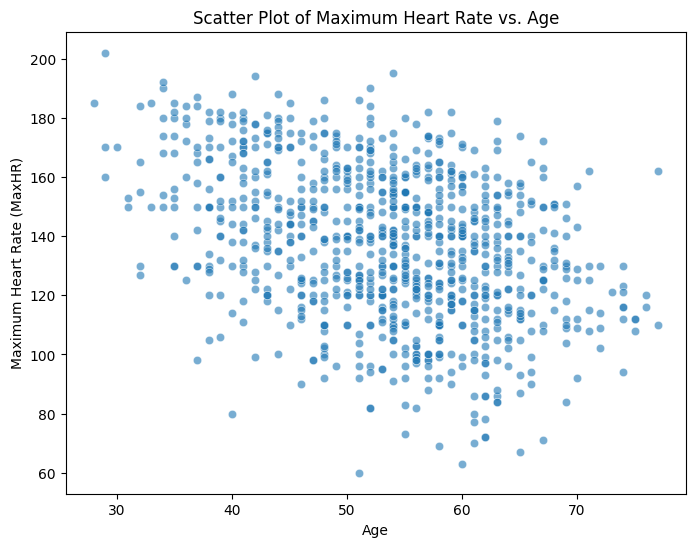

In [20]:
print("\n--- Example 1: Scatter Plot (Age vs MaxHR) ---")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='MaxHR', alpha=0.6) # alpha for transparency
plt.title('Scatter Plot of Maximum Heart Rate vs. Age')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (MaxHR)')
plt.show()

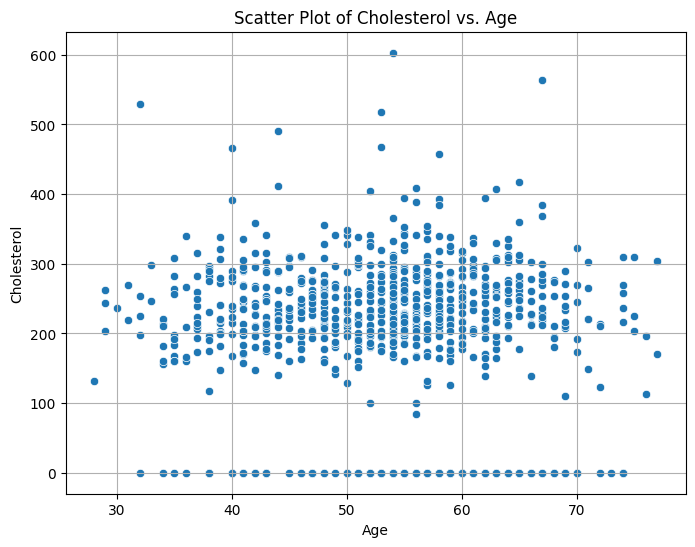

In [22]:
# Create scatter plot: Cholesterol vs Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Cholesterol', data=df)

# Add titles and labels
plt.title('Scatter Plot of Cholesterol vs. Age')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.grid(True)
plt.show()


--- Example 2: Correlation Matrix Heatmap ---


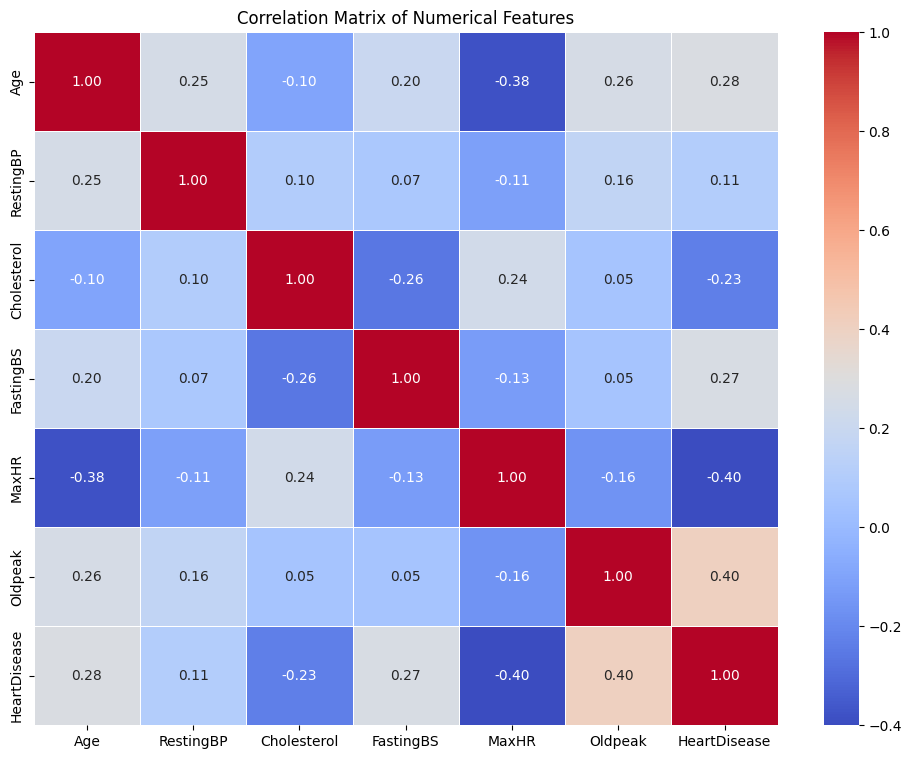

In [23]:
print("\n--- Example 2: Correlation Matrix Heatmap ---")

# Select only numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr() # Calculate Pearson correlations

plt.figure(figsize=(12, 9)) # Adjusted size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


--- Example 3: Pair Plot ---


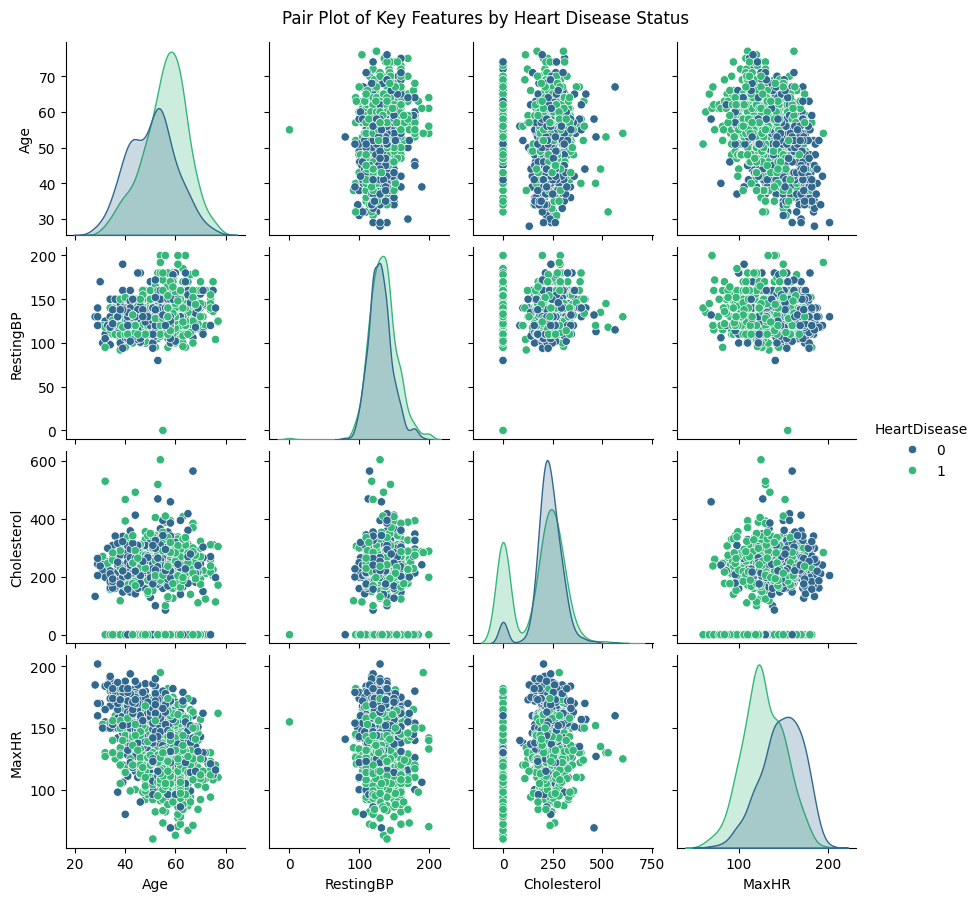

In [24]:
print("\n--- Example 3: Pair Plot ---")

# Select a subset of columns for the pairplot for clarity
cols_for_pairplot = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'HeartDisease']

# Create the pairplot, coloring points by HeartDisease status
# Using height=2 makes the plot smaller, adjust as needed
sns.pairplot(df[cols_for_pairplot].dropna(), # Drop rows with NaN Cholesterol for this plot
             hue='HeartDisease',
             palette='viridis',
             diag_kind='kde', # Kernel Density Estimate on diagonals
             height=2.2)
plt.suptitle('Pair Plot of Key Features by Heart Disease Status', y=1.02) # Adjust title position
plt.show()


--- Example 4: Joint Plot (Oldpeak vs MaxHR) ---


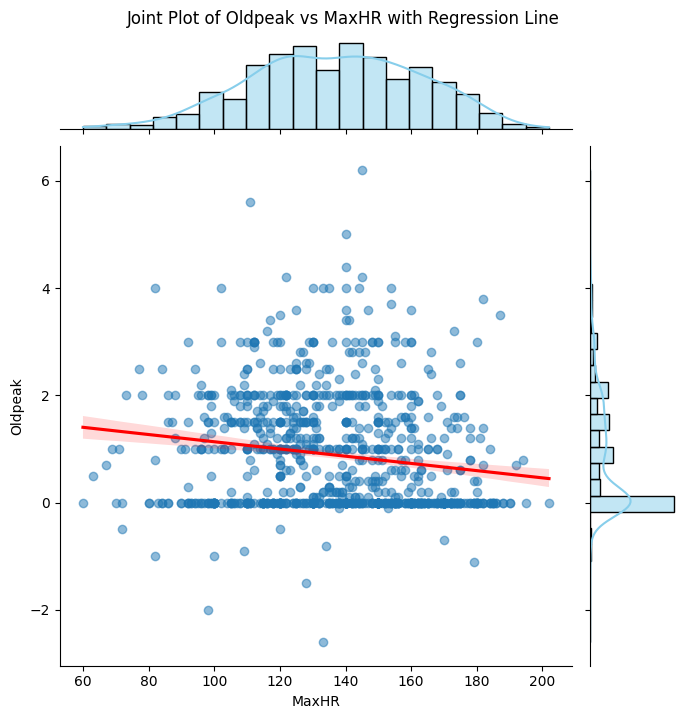

In [26]:
print("\n--- Example 4: Joint Plot (Oldpeak vs MaxHR) ---")

# Create a joint plot with a regression line
sns.jointplot(data=df, x='MaxHR', y='Oldpeak', kind='reg', height=7,
              joint_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}},
              marginal_kws={'color': 'skyblue', 'kde': True})
# kind='reg': adds a scatter plot and a linear regression line
# joint_kws: pass arguments to the central plot (e.g., line color)
# marginal_kws: pass arguments to the marginal plots (e.g., color, add kde)

plt.suptitle('Joint Plot of Oldpeak vs MaxHR with Regression Line', y=1.02)
plt.show()

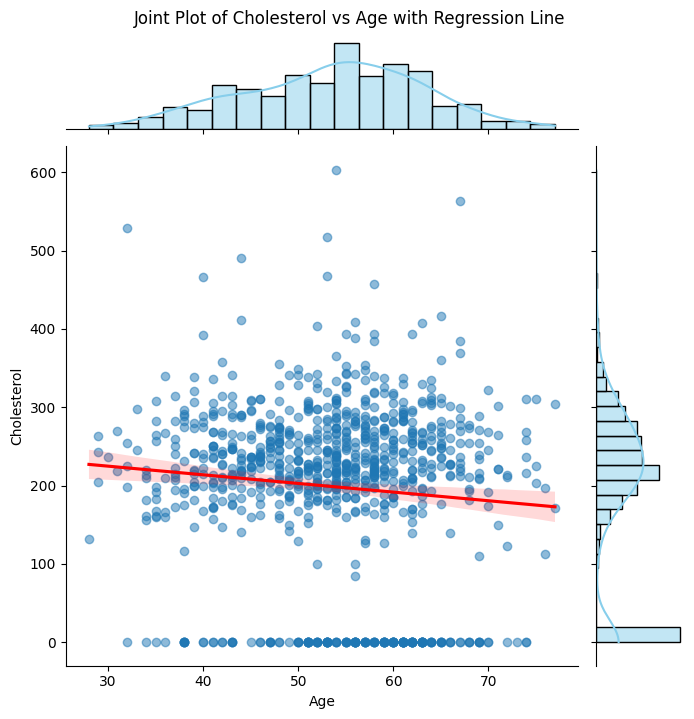

In [27]:
# Joint Plot for Cholesterol vs Age
sns.jointplot(
    data=df,
    x='Age',
    y='Cholesterol',
    kind='reg',  # Adds a regression line
    height=7,    # Adjust the size of the plot
    joint_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.5}},  # Customize line and scatter
    marginal_kws={'color': 'skyblue', 'kde': True}  # Add KDE to marginal plots
)

plt.suptitle('Joint Plot of Cholesterol vs Age with Regression Line', y=1.02)  # Adjust title position
plt.show()

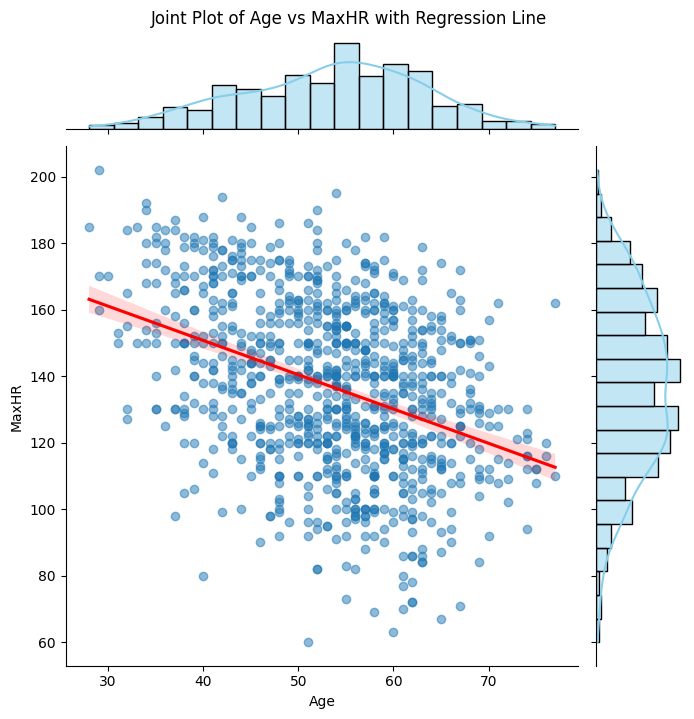

In [29]:
sns.jointplot(
    data=df,
    x='Age',
    y='MaxHR',
    kind='reg',
    height=7,
    joint_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.5}},
    marginal_kws={'color': 'skyblue', 'kde': True}
)
plt.suptitle('Joint Plot of Age vs MaxHR with Regression Line', y=1.02)
plt.show()